In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the dataset
#url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv"
data = pd.read_csv('winequality-red.csv')



In [3]:
# Define the cutoff for wine quality (7 or higher as 'good', the rest as 'not good')
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Split the data into features (X) and the target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [4]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = classifier.predict(X_test)



Confusion Matrix:
 [[255  18]
 [ 23  24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       273
           1       0.57      0.51      0.54        47

    accuracy                           0.87       320
   macro avg       0.74      0.72      0.73       320
weighted avg       0.87      0.87      0.87       320



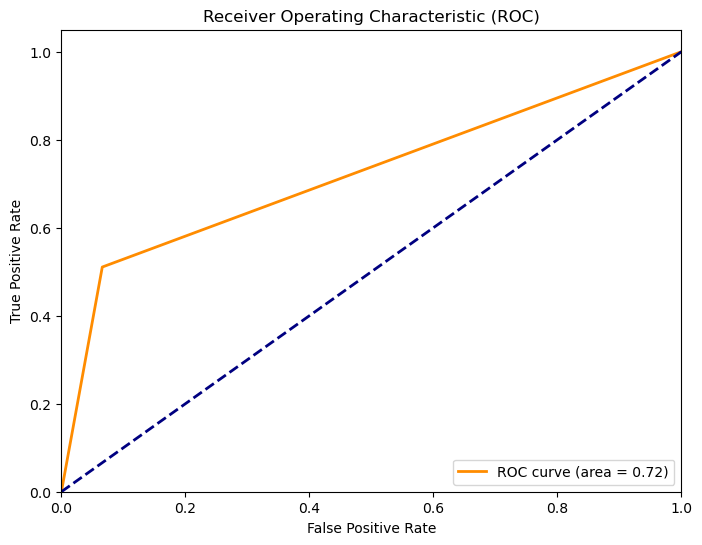

In [5]:
# Evaluate the model
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
